## Week-lab2: Decision trees classifiers
**This lab**: the aim is to build and evaluate classification models for the titanic dataset based on decision trees classifiers, and to fine tune their hyperparameters using cross-validation. During this lab it is highly recommended to check the **sklearn** documentation on `class tree.DecisionTreeClassifier` to fit decision trees classifiers in Python, by simply typing in the name of function via [*scikit-learn* website](https://scikit-learn.org/stable/index.html).


In [1]:
try:
    import pandas
    import numpy
    import sklearn
    import matplotlib
except:
    !pip install pandas==2.2.2 numpy==1.26.4 scikit-learn==1.5.1 matplotlib==3.9.2

### Install dependencies

In [2]:
# Import necessary libraries.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree 
from sklearn.metrics import confusion_matrix, accuracy_score

import matplotlib.pyplot as plt

# Set up the RNG for numpy.random
RANDOM_SEED = 42
np.random.seed(seed=RANDOM_SEED)

### Load titanic dataset
Use **Pandas**’s `read_csv` command to load the `titanic.csv` file in a table. From this table extract a binary (0-1) vector y of labels/outcomes indicating a passenger had survived or not. Create a feature matrix X whose columns are *Pclass, Sex, Age, Siblings_SpousesAboard, Parents_ChildrenAboard, and Fare* features. You need to convert the Sex varialble (currently is string) into a 0-1 numerical variable to include it in the feature matrix.

In [8]:
df = pd.read_csv('titanic(1).csv')
# your code to build x and y
y = df.Survived
X = df.loc[:,['Pclass', 'Sex', 'Siblings_SpousesAboard', 'Parents_ChildrenAboard', 'Fare']]
Sex = X['Sex'].replace(['male','female'],[0,1])
X['Sex'] = Sex
X.head()

/var/folders/3l/gcmv93g129dfkprq8_7b9gt80000gn/T/ipykernel_66797/1836430710.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Sex = X['Sex'].replace(['male','female'],[0,1])


,Pclass,Sex,Siblings_SpousesAboard,Parents_ChildrenAboard,Fare
0,3,0,1,0,7.2500
1,1,1,1,0,71.2833
2,3,1,0,0,7.9250
3,1,1,1,0,53.1000
4,3,0,0,0,8.0500


### Split this data randomly into Train and Test sets with proportions 80%-20%.

In [9]:
P = 0.2
data_train, data_test, labels_train, labels_test = train_test_split(X, y, test_size=0.2, random_state=42)
unique_label_count = pd.Series(y).nunique()


### Fit and Visualise decision trees for classification
Use sklearn command `tree.DecisionTreeClassifier` to fit decision trees to classify the train data with various `max_leaf_nodes` options. The number of leaves of a tree is equal to the number of splits plus one.

Visualise each tree model (e.g., named `clf`) using command `tree.plot_tree`.

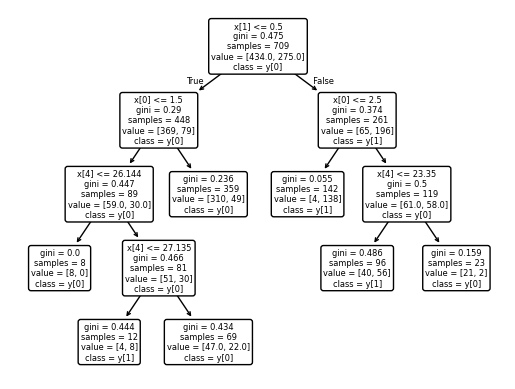

In [14]:
# your code using tree.plot_tree()
for i in [6]:
    df = tree.DecisionTreeClassifier(max_leaf_nodes = i + 1)
    df.fit(data_train, labels_train)
    tree.plot_tree(df,rounded = True, class_names = True)
plt.show()


In [ ]:
# compute the confusion matrix


In [41]:
# your code here 

Use information from confusion matrix to compute and print the classification accuracy, precision and recall, evaluated on the train and test data. You can also import other functions from `sklearn.metrics` (e.g., accuracy_score).

In [42]:
# your code here

### Cross validation
Split the train data further randomly into train & validation proportions 80%-20%, to perform a cross validation step. Plot the Validation Curves displaying the classification accuracies on the train & validation data against the model complexity, here, the tree's hyperparameter `max_leaf_nodes` ranging from 2 to 200.

In [43]:
P_CV = 0.2
MAX_LEAF = 200

data_train_CV, data_val_CV, labels_train_CV, labels_val_CV = train_test_split(data_train, labels_train, test_size=P_CV, random_state=RANDOM_SEED)

# your code here

Can you see the over/underfitting cases in your validtion curves?
What's the best `max_leaf_nodes` number for the decision tree? Implement a grid search to find this optimal hyperparamter so that it maximises the validation accuracy.

In [44]:
# your code here

### Repeat Cross validation 50 times to get smoother results
You might also want to make better use of all of the data, perhaps the 20% we picked here for validation just happen to be particularly difficult examples? We can get a better estimate of how the entire dataset will perform if we perform multiple rounds of cross validation. Therefore in this part, repeat the random train-validation split and the associated cross validation procedure for 50 times. Average the Validation Curves over these 10 runs. Do you see smoother results?

In [45]:
RUNS = 50
MAX_LEAF = 200

# your code here

Run a hyperparamter grid search on these averaged validation accuracies to determine the best number for the tree's `max_leaf_nodes`.

In [46]:
# your code here

Use this optimal parameter to train a decision tree on whole training data, report the classification accuracies for the training and testing datasets. 

In [34]:
# your code here